# Universal Adversarial Perturbations starring Frank-Wolfe:
# Experiments and Results



In [ ]:
from algorithms import *
from lenet5 import *
from alexnet import *
import utils
import numpy as np
import matplotlib.pyplot as plt
import time

## MNIST Dataset and LeNet-5



In [ ]:
data_workers, y_workers, lenet5, right_pred_data, right_pred_labels, test_x, test_y =  utils.get_data(load=False)

##**Decentralized Stochastic Gradient Free Frank-Wolfe**

### Online run


In [ ]:
M = 10          # number of workers
d = 28*28       # images dimension
epsilon = 0.25  # norm constraint
m = 15          # sampled directions
T = 5           # iterations

start = time.time()
deltas = decentralized_stochastic_gradient_free_FW(data_workers, y_workers,
                                                   lenet5.negative_loss, T, M, d, epsilon, m, verbose=1)
end = time.time()
print('Time elapsed: ', (end - start)/60)

### Offline run and results

    M = 10
    d = 28*28
    epsilon = 0.25
    m = 15
    T = 20, 50, 100

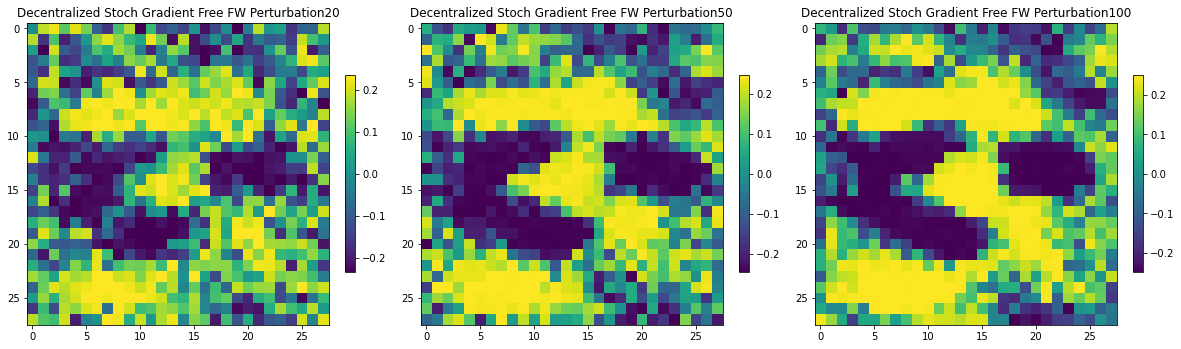

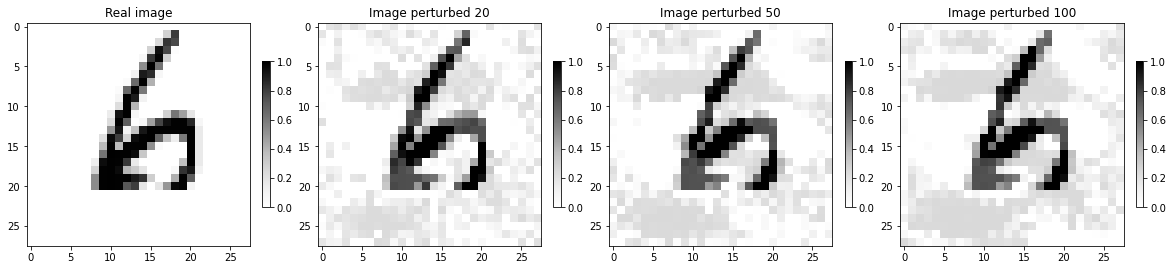

Model Image perturbed 20 prediction is:  8
Model Image perturbed 50 prediction is:  8
Model Image perturbed 100 prediction is:  8


In [ ]:
directory = "../data/perturbations/decentralized_stoch/"
Ts = [20, 50 ,100]
deltas = []
for T in Ts:
    deltas.append(np.load(f'{directory}report_perturbation_m15_T{T}.npy'))

n_rows, n_columns = 1, 3
fig, axes = plt.subplots(n_rows, n_columns, figsize=(20, 20))

###### Perturbation plots
for idx, delta in enumerate(deltas):
    axis, img = utils.get_image_perturbation(delta, f'Decentralized Stoch Gradient Free FW Perturbation{Ts[idx]}',
                                      axes[idx])
plt.show()

###### Image perturbed plots
idx_image = np.random.randint(low=0, high=right_pred_data.shape[0])
image_test = right_pred_data[idx_image].numpy()
fig, axes = plt.subplots(n_rows, n_columns+1, figsize=(20, 20))
img = axes[0].imshow(image_test.reshape(28,28), cmap='Greys')
axes[0].set_title('Real image')
fig.colorbar(img, ax=axes[0], fraction=0.03, pad=0.05)

for idx, delta in enumerate(deltas):
    axis, img = utils.get_image_perturbed(delta, image_test, f'Image perturbed {Ts[idx]}', axes[idx+1])
plt.show()
for idx, delta in enumerate(deltas):
    prediction = utils.predict_single_img_perturbation(lenet5, image_test, delta)
    print( f'Model Image perturbed {Ts[idx]} prediction is: ', prediction)

$\rightarrow$ Performance of LeNet-5 on the original MNIST test set:

In [ ]:
evaluation = lenet5.model.evaluate(test_x, test_y, verbose=0)
print( f'Error/loss: {evaluation[0]} \nAccuracy: {evaluation[1]}\n')

Error/loss: 0.06795267015695572 
Accuracy: 0.9779999852180481



$\rightarrow$ Performance of LeNet-5 on the adversarial examples:

In [ ]:
for idx, delta in enumerate(deltas):
    evaluation = utils.evaluate_perturbed_images(lenet5, right_pred_data, right_pred_labels, delta, verbose=0)
    print( f'Model {idx+1} with {Ts[idx]} iterations: \n\t Error/loss: {evaluation[0]} \n\t Accuracy: {evaluation[1]}\n')

Model 1 with 20 iterations: 
	 Error/loss: 2.035454511642456 
	 Accuracy: 0.5525137186050415

Model 2 with 50 iterations: 
	 Error/loss: 3.5296566486358643 
	 Accuracy: 0.3945654332637787

Model 3 with 100 iterations: 
	 Error/loss: 3.785723924636841 
	 Accuracy: 0.36871564388275146



### Comparison with Gaussian noise

Adversarial examples show a less visible and less disturbing noise than images injected with Gaussian noise. However, LeNet-5 is able to correctly classify, with high accuracy, only the latter.

308/308 [==============================] - 3s 9ms/step - loss: 0.3335 - accuracy: 0.8917


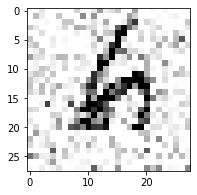

Model Image perturbed prediction is:  6


In [ ]:
# Gaussian noise
noise = np.random.normal(0, 0.3, right_pred_data.shape)
gaussian_noise_data = right_pred_data + noise
gaussian_noise_data = np.clip(gaussian_noise_data, 0., 1.)
lenet5.model.evaluate(gaussian_noise_data, right_pred_labels)
gauss_noise_image = gaussian_noise_data[idx_image]
fig, ax = plt.subplots(figsize=(3, 3))
ax.imshow(gauss_noise_image, cmap='Greys')
plt.show()
prediction = utils.predict_single_img_perturbation(lenet5, right_pred_data[idx_image], noise[idx_image])
print( f'Model Image perturbed prediction is: ', prediction)

##**Decentralized Variance-Reduced Stochastic Gradient Free Frank-Wolfe**

### Offline run and results

    M = 5
    d = 28*28
    epsilon = 0.25
    T = 20
    S1 = 800
    n = 5, 10
    S2 = 3
    q = 5, 7, 10

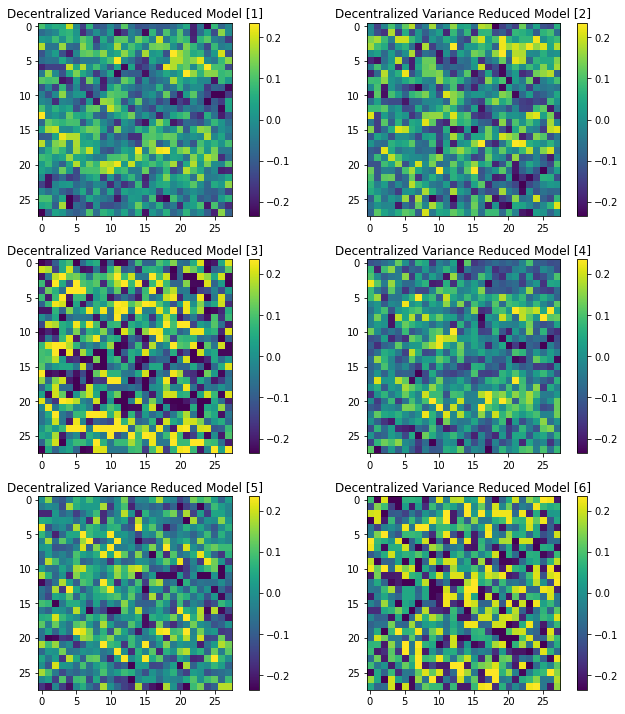

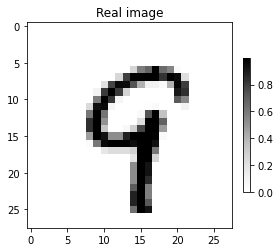

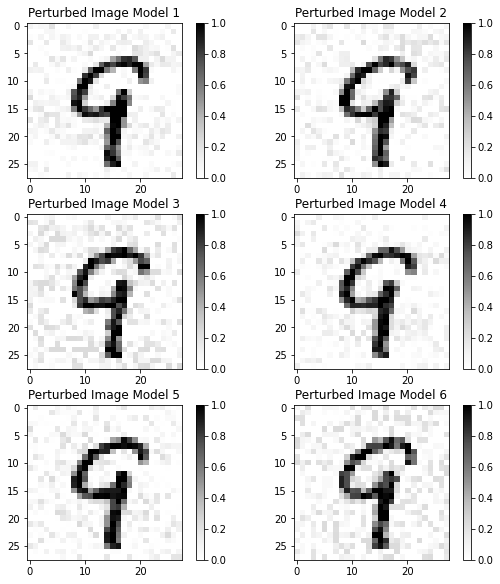

Perturbed Image for Model 1 prediction is:  9
Perturbed Image for Model 2 prediction is:  9
Perturbed Image for Model 3 prediction is:  9
Perturbed Image for Model 4 prediction is:  8
Perturbed Image for Model 5 prediction is:  9
Perturbed Image for Model 6 prediction is:  9


In [ ]:
directory = "../data/perturbations/variance_reduced/"
files_delta = [(5, 5), (5, 7), (5,10), (10, 5), (10, 7), (10, 10)]
deltas = []
for file in files_delta:
    deltas.append(np.load(f'{directory}perturbation_variance_n{file[0]}_q{file[1]}.npy'))

#deltas.append(np.load(f'{directory}perturbation_variance_charming.npy'))

###### Perturbation plots
n_rows, n_columns = 3, 2
fig, axes = plt.subplots(n_rows, n_columns, figsize=(10, 10))
idx_col = 0
for idx, delta in enumerate(deltas):
    axis = axes[idx//2, idx_col]
    axis, img = utils.get_image_perturbation(delta, f'Decentralized Variance Reduced Model {[idx+1]}',
                                      axis)
    idx_col +=1
    idx_col = 0 if idx_col > 1 else idx_col

fig.tight_layout(pad=1.0)
plt.show()

###### Image perturbed plots
idx_image = np.random.randint(low=0, high=right_pred_data.shape[0])
image_test = right_pred_data[idx_image].numpy()
fig, axes = plt.subplots(1, 1, figsize=(4, 4))
img = axes.imshow(image_test.reshape(28,28), cmap='Greys')
axes.set_title('Real image')
fig.colorbar(img, ax=axes, fraction=0.03, pad=0.05)

fig, axes = plt.subplots(n_rows, n_columns, figsize=(8, 8))
idx_col = 0
for idx, delta in enumerate(deltas):
    axis = axes[idx//2, idx_col]
    axis, img = utils.get_image_perturbed(delta, image_test, f'Perturbed Image Model {idx+1}', axis)
    idx_col +=1
    idx_col = 0 if idx_col > 1 else idx_col
fig.tight_layout(pad=0.3)
plt.show()
for idx, delta in enumerate(deltas):
    prediction = utils.predict_single_img_perturbation(lenet5, image_test, delta)
    print( f'Perturbed Image for Model {idx+1} prediction is: ', prediction)

Model 1 has q=5, n=5 <br />
Model 2 has q=7, n=5  <br />
Model 3 has q=10, n=5  <br />
Model 4 has q=5, n=10 <br />
Model 5 has q=7, n=10 <br />
Model 6 has q=10, n=10

$\rightarrow$ Performance of LeNet-5 on the original MNIST test set:

In [ ]:
evaluation = lenet5.model.evaluate(test_x, test_y, verbose=0)
print( f'Error/loss: {evaluation[0]} \nAccuracy: {evaluation[1]}\n')

Error/loss: 0.06795267015695572 
Accuracy: 0.9779999852180481



$\rightarrow$ Performance of LeNet-5 on the images injected with Gaussian noise:

In [ ]:
evaluation = lenet5.model.evaluate(gaussian_noise_data, right_pred_labels, verbose=0)
print( f'Error/loss: {evaluation[0]} \nAccuracy: {evaluation[1]}\n')

Error/loss: 0.3644445836544037 
Accuracy: 0.8960828185081482



$\rightarrow$ Performance of LeNet-5 on the adversarial examples:

In [ ]:
for idx, delta in enumerate(deltas):
    evaluation = utils.evaluate_perturbed_images(lenet5, right_pred_data, right_pred_labels, delta, verbose=0)
    print( f'Decentralized Variance Reduced Gradient Free FW Method. \n Model{idx+1}: \n\t Error/loss: {evaluation[0]} \n\t Accuracy: {evaluation[1]}\n')

Decentralized Variance Reduced Gradient Free FW Method. 
 Model1: 
	 Error/loss: 0.24661460518836975 
	 Accuracy: 0.9236719012260437

Decentralized Variance Reduced Gradient Free FW Method. 
 Model2: 
	 Error/loss: 0.0737563893198967 
	 Accuracy: 0.9743537306785583

Decentralized Variance Reduced Gradient Free FW Method. 
 Model3: 
	 Error/loss: 0.1512974500656128 
	 Accuracy: 0.9417871236801147

Decentralized Variance Reduced Gradient Free FW Method. 
 Model4: 
	 Error/loss: 0.43256446719169617 
	 Accuracy: 0.8400163054466248

Decentralized Variance Reduced Gradient Free FW Method. 
 Model5: 
	 Error/loss: 0.15935206413269043 
	 Accuracy: 0.9365968108177185

Decentralized Variance Reduced Gradient Free FW Method. 
 Model6: 
	 Error/loss: 0.03634767606854439 
	 Accuracy: 0.9899246692657471



##**Distributed Stochastic Gradient Free Frank-Wolfe**

### Offline run and results

$\lVert \mathbf{W} - \frac{1}{M}\mathbf{11^T}\rVert = 0.44$

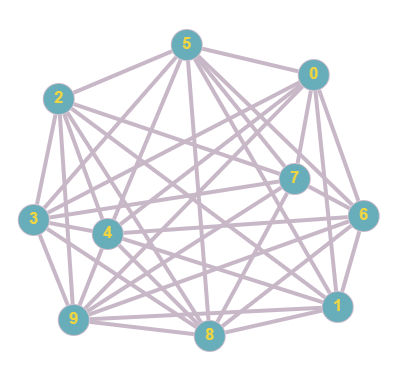

    M = 10
    d = 28*28
    epsilon = 0.25
    m = 15
    T = 20, 50, 100

In [ ]:
directory = "../data/perturbations/distributed/"
Ts = [20, 50 ,100]
# For each experiment, select the best perturbation produced by the workers
# i.e. the one that lowers more the accuracy of LeNet-5
deltas = []
for T in Ts:
    delta_workers = np.load(f'{directory}report_distributed_delta_{T}_15.npy')
    best_delta, worker_idx = utils.get_distributed_best_delta(lenet5, right_pred_data, right_pred_labels, delta_workers, verbose=1)
    deltas.append(best_delta)

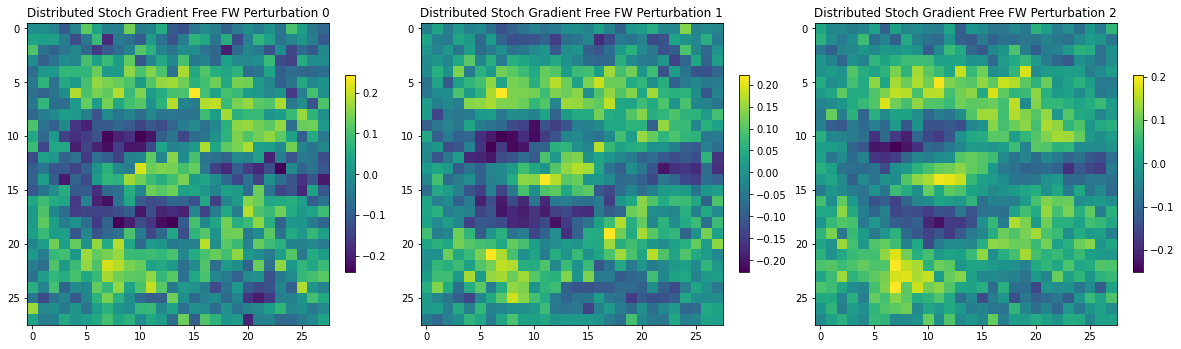

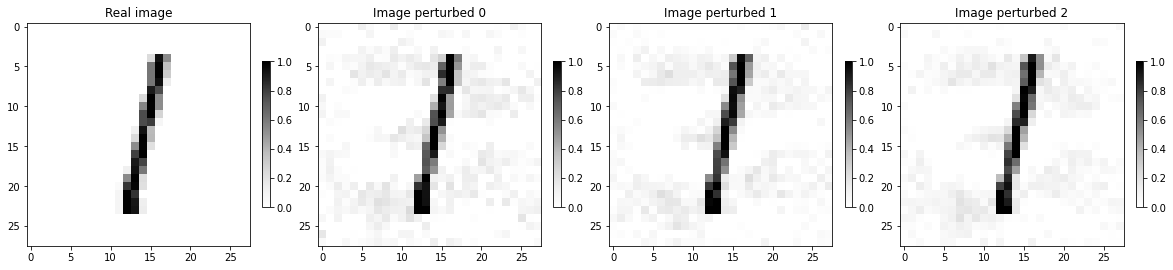

Image perturbed for Model 0 prediction is:  3
Image perturbed for Model 1 prediction is:  3
Image perturbed for Model 2 prediction is:  3


In [ ]:
n_rows, n_columns = 1, 3
fig, axes = plt.subplots(n_rows, n_columns, figsize=(20, 20))
###### Perturbation plots
for idx, delta in enumerate(deltas):
    axis, img = utils.get_image_perturbation(delta, f'Distributed Stoch Gradient Free FW Perturbation {idx}',
                                      axes[idx])
plt.show()

###### Image perturbed plots
idx_image = np.random.randint(low=0, high=right_pred_data.shape[0])
image_test = right_pred_data[idx_image].numpy()
fig, axes = plt.subplots(n_rows, n_columns+1, figsize=(20, 20))
img = axes[0].imshow(image_test.reshape(28,28), cmap='Greys')
axes[0].set_title('Real image')
fig.colorbar(img, ax=axes[0], fraction=0.03, pad=0.05)

for idx, delta in enumerate(deltas):
    axis, img = utils.get_image_perturbed(delta, image_test, f'Image perturbed {idx}', axes[idx+1])
plt.show()
for idx, delta in enumerate(deltas):
    prediction = utils.predict_single_img_perturbation(lenet5, image_test, delta)
    print( f'Image perturbed for Model {idx} prediction is: ', prediction)

$\rightarrow$ Performance of LeNet-5 on the original MNIST test set:

In [ ]:
evaluation = lenet5.model.evaluate(test_x, test_y, verbose=0)
print( f'Error/loss: {evaluation[0]} \nAccuracy: {evaluation[1]}\n')

Error/loss: 0.06795267015695572 
Accuracy: 0.9779999852180481



$\rightarrow$ Performance of LeNet-5 on the images injected with Gaussian noise:

In [ ]:
evaluation = lenet5.model.evaluate(gaussian_noise_data, right_pred_labels, verbose=0)
print( f'Error/loss: {evaluation[0]} \nAccuracy: {evaluation[1]}\n')

Error/loss: 0.3644445836544037 
Accuracy: 0.8960828185081482



$\rightarrow$ Performance of LeNet-5 on the adversarial examples:

In [ ]:
for idx, delta in enumerate(deltas):
    evaluation = utils.evaluate_perturbed_images(lenet5, right_pred_data, right_pred_labels, delta, verbose=0)
    print( f'Model {idx+1} with {Ts[idx]} iterations: \n\t Error/loss: {evaluation[0]} \n\t Accuracy: {evaluation[1]}\n')

Model 1 with 20 iterations: 
	 Error/loss: 1.0775243043899536 
	 Accuracy: 0.7346835136413574

Model 2 with 50 iterations: 
	 Error/loss: 0.958470344543457 
	 Accuracy: 0.7461835741996765

Model 3 with 100 iterations: 
	 Error/loss: 0.9305565357208252 
	 Accuracy: 0.7583960890769958



## **Generalization across Deep Neural Networks**

## MNIST Dataset and AlexNet
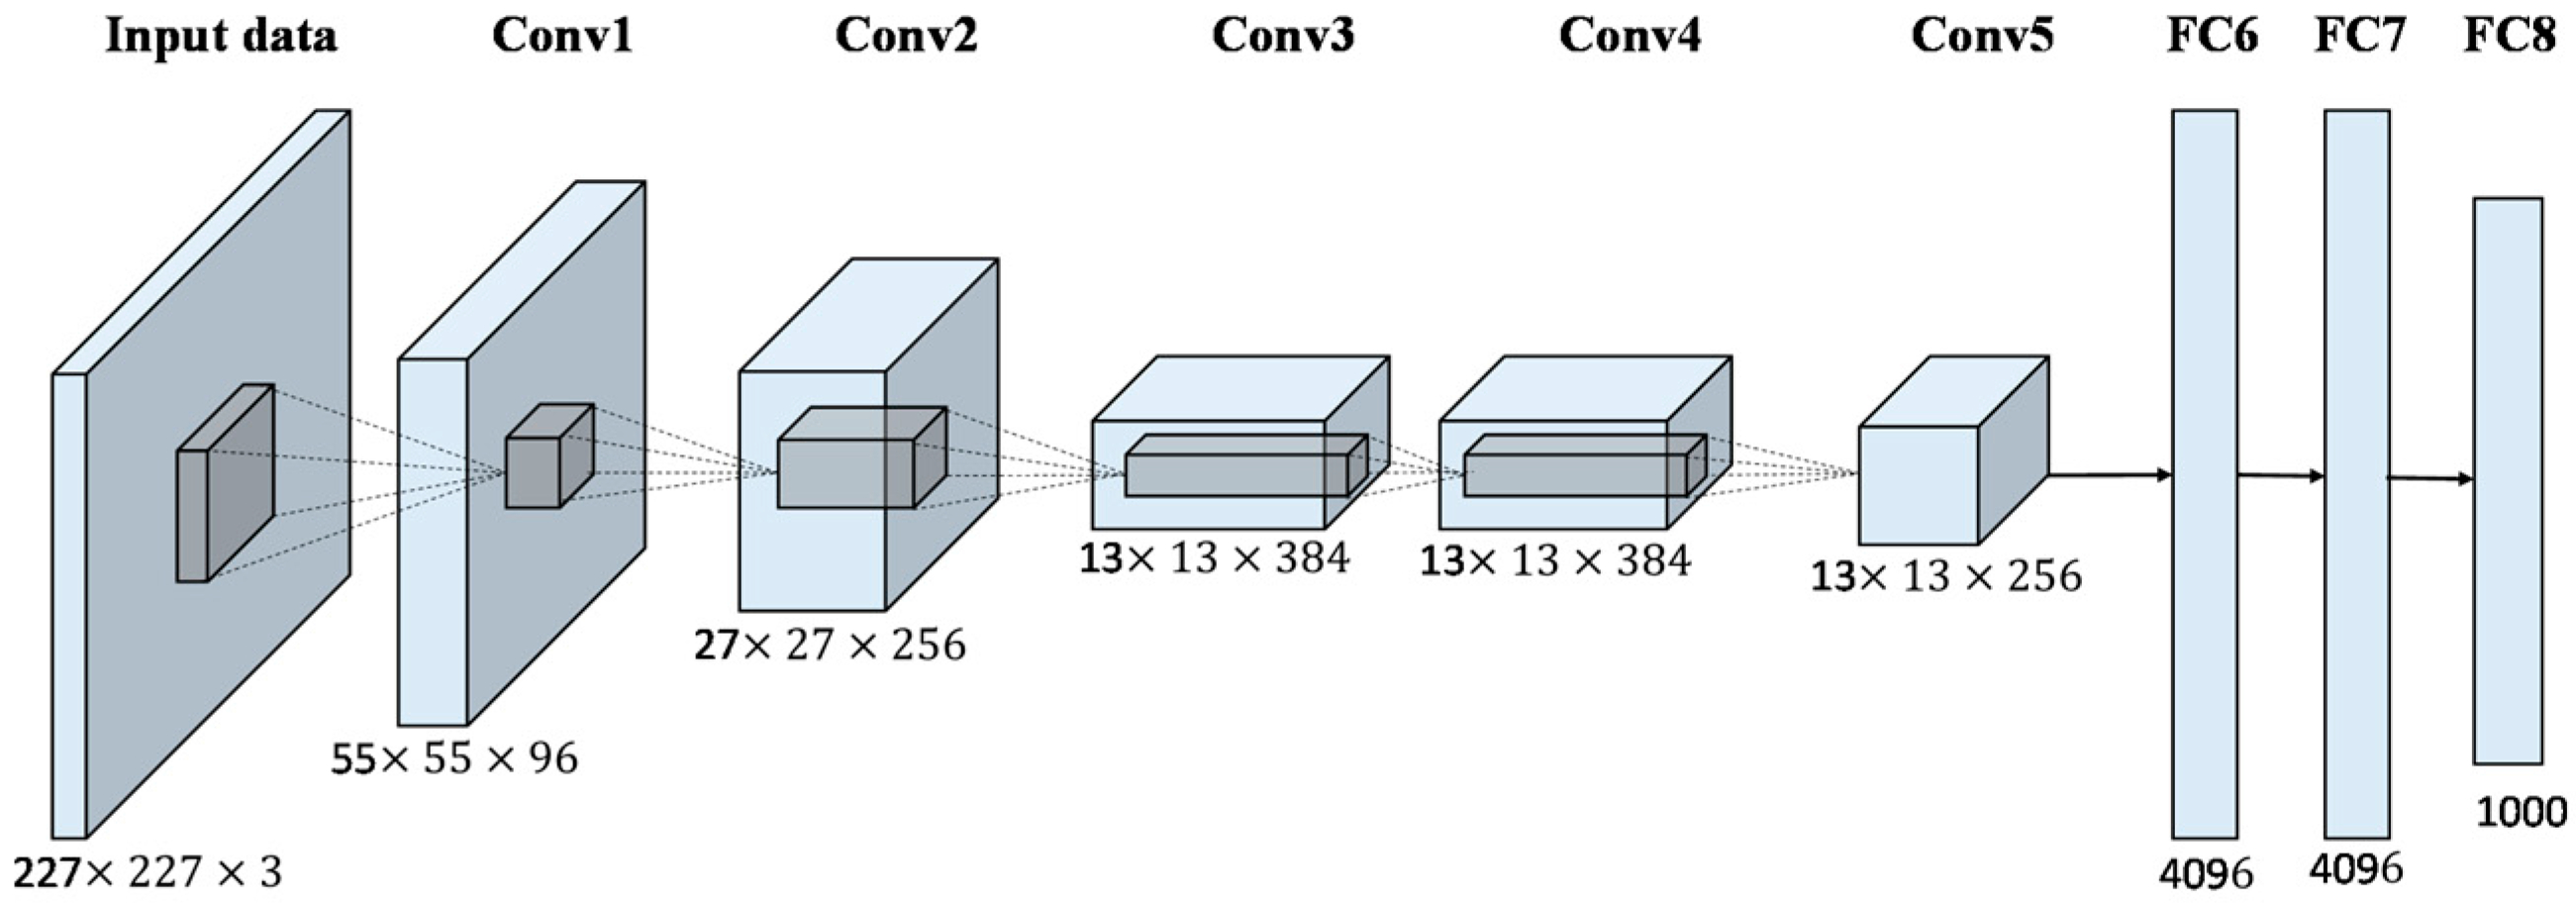


In [ ]:
path = '../data/alexnet'
alex = AlexNet(path=path, load=False)
_,(test_x, test_y) = datasets.mnist.load_data()

$\rightarrow$ Pre-processing needed for the correct functioning of AlexNet:





In [ ]:
# Adversarial perturbation:
delta = np.load("report_perturbation_m15_T100.npy")                 # 28 x 28
delta = np.tile(delta, 10000)                                       
delta = delta.reshape(10000, 28, 28)                                # 10000 x 28 x 28
# perturbed data with delta:
perturbed_data = test_x + delta
perturbed_data = np.clip(perturbed_data,0,1)
# adding 3 channels for alexnet:
perturbed_data = tf.pad(perturbed_data, [[0, 0], [2, 2], [2, 2]])   # 10000 x 32 x 32
perturbed_data = np.clip(perturbed_data,0,1)
perturbed_data = tf.expand_dims(perturbed_data, axis=3, name=None)  # 10000 x 32 x 32 x 1
perturbed_data = tf.repeat(perturbed_data, 3, axis=3)               # 10000 x 32 x 32 x 3

In [ ]:
# Gaussian perturbation:
noise = np.random.normal(0,0.3,784)
noise = np.tile(noise, 10000)
noise = noise.reshape(10000, 28, 28)
# perturbed data with noise:
noise_data = test_x + noise
noise_data = np.clip(noise_data,0,1)
# adding 3 channels for alexnet:
noise_data = tf.pad(noise_data, [[0, 0], [2, 2], [2, 2]])
noise_data = np.clip(noise_data,0,1)
noise_data = tf.expand_dims(noise_data, axis=3, name=None)
noise_data = tf.repeat(noise_data, 3, axis=3)

In [ ]:
# MNIST test set:
# adding 3 channels for alexnet:
test_x = tf.pad(test_x, [[0, 0], [2, 2], [2, 2]]) / 255
test_x = tf.expand_dims(test_x, axis=3, name=None)
test_x = tf.repeat(test_x, 3, axis=3)

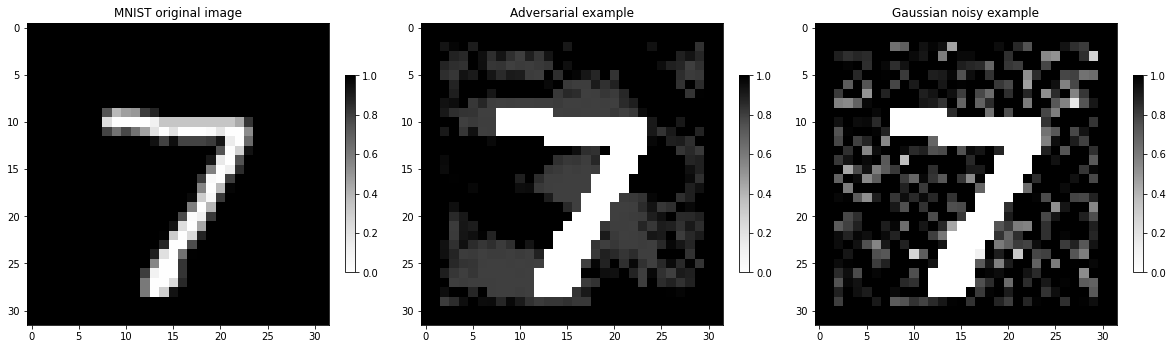

In [ ]:
n_rows, n_columns = 1, 3
fig, axes = plt.subplots(n_rows, n_columns, figsize=(20, 20))

img = axes[0].imshow(test_x[0], cmap='Greys')
axes[0].set_title('MNIST original image')
plt.colorbar(img, ax=axes[0], fraction=0.03, pad=0.05)

img = axes[1].imshow(perturbed_data[0], cmap='Greys')
axes[1].set_title('Adversarial example')
plt.colorbar(img, ax=axes[1], fraction=0.03, pad=0.05)

img = axes[2].imshow(noise_data[0], cmap='Greys')
axes[2].set_title('Gaussian noisy example')
plt.colorbar(img, ax=axes[2], fraction=0.03, pad=0.05)

plt.show()

$\rightarrow$ Performance of AlexNet on the original MNIST test set:

In [ ]:
evaluation = alex.model.evaluate(test_x, test_y, verbose=0)
print( f'Error/loss: {evaluation[0]} \nAccuracy: {evaluation[1]}\n')

Error/loss: 0.06383901834487915 
Accuracy: 0.9836000204086304



$\rightarrow$ Performance of AlexNet on the images injected with Gaussian noise:

In [ ]:
evaluation = alex.model.evaluate(noise_data, test_y, verbose=0)
print( f'Error/loss: {evaluation[0]}\nAccuracy: {evaluation[1]}\n')

Error/loss: 0.9090547561645508
Accuracy: 0.7505999803543091



$\rightarrow$ Performance of AlexNet on the adversarial examples:

In [ ]:
evaluation = alex.model.evaluate(perturbed_data, test_y, verbose=0)
print( f'Error/loss: {evaluation[0]} \nAccuracy: {evaluation[1]}\n')

Error/loss: 2.58542799949646 
Accuracy: 0.39570000767707825



# Conclusions

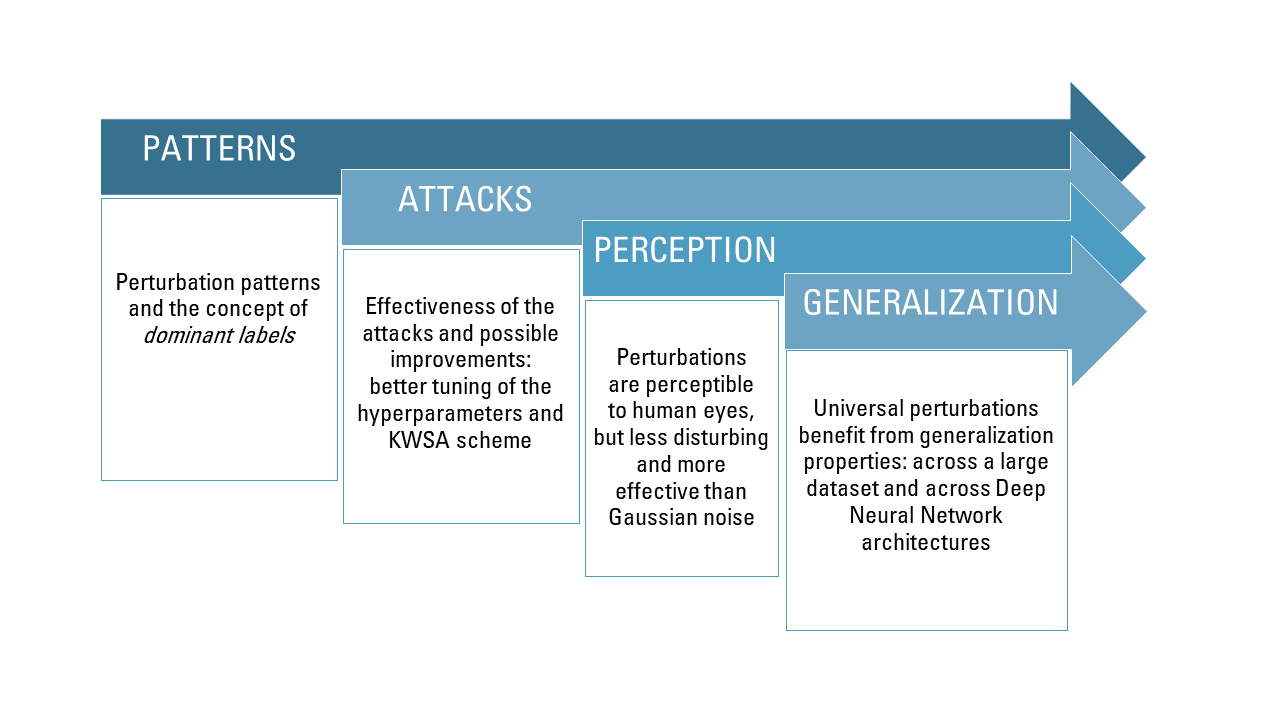

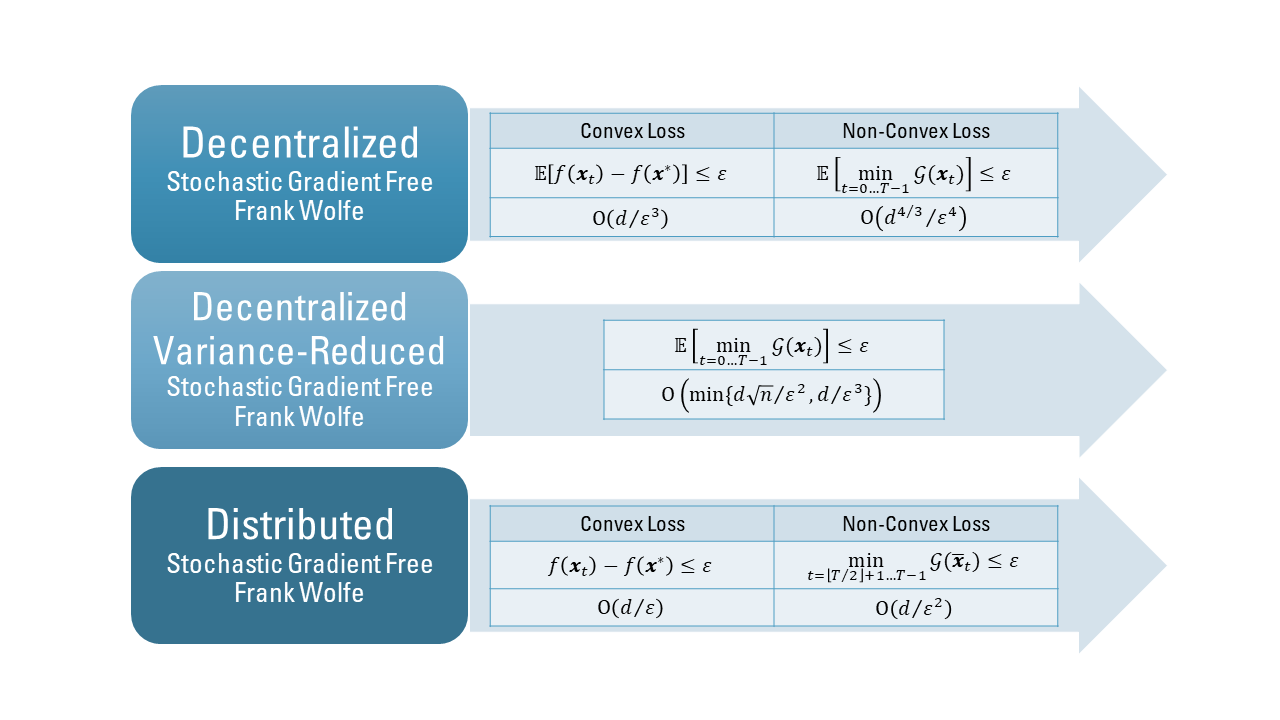